<a href="https://www.kaggle.com/code/asmahachaichi/digit-recognizer-mnist-cnn?scriptVersionId=203468682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
X_train = train.drop("label", axis=1)
y_train = train["label"]

## Preprocessing the Data
In this section we will be doing:
- Normalization: Scale pixel values to the range [0, 1] by dividing by 255.
- Reshaping: Reshape the data into its original 28x28 format.
- One-hot Encoding: Convert the labels into one-hot encoded vectors.

In [4]:
X_train = X_train / 255.0
test = test / 255.0

In [5]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

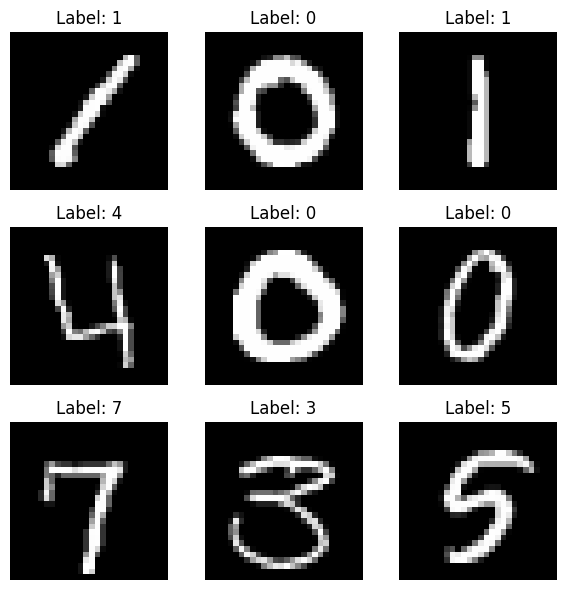

In [6]:
#display the first 9 images in the dataset
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray') 
    plt.title(f"Label: {y_train[i]}") 
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
y_train = to_categorical(y_train, num_classes=10)

In [8]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
print(f"Training set size: {X_train_new.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (33600, 28, 28, 1)
Validation set size: (8400, 28, 28, 1)


## Model Training
For this part, we will be building a Convolutional Neural Network (CNN) model using Keras, designed for image classification tasks.
Our CNN model is composed of 7 layers:
1. Conv2D(32, (3, 3)): Extract low-level features like edges from the input image.
2. MaxPooling2D(pool_size=(2, 2)): Reduce the size of the feature maps (downsampling) to retain important information while reducing computational complexity.
3. Conv2D(64, (3, 3)): Learn more complex features from the downsampled data.
4. MaxPooling2D(pool_size=(2, 2)): Further reduce the dimensionality of the feature maps.
5. Flatten(): Convert the 2D feature maps into a 1D vector to pass into fully connected layers.
6. Dense(128): Fully connected layer for learning high-level features.
7. Dense(10, softmax): Output layer that gives the probability distribution for the 10 possible digit classes (0-9).

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_new, y_train_new, epochs=10, batch_size=64)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.8517 - loss: 0.4886
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9803 - loss: 0.0647
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9865 - loss: 0.0413
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9913 - loss: 0.0275
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9933 - loss: 0.0203
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9948 - loss: 0.0168
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9962 - loss: 0.0121
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9970 - loss: 0.0100
Epoch 9/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9977 - loss: 0.0075
Epoch 10/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9963 - loss: 0.0099


## Evaluating the Model
After training, we will evaluate the model on a validation set to see how well it generalizes to unseen data.

In [13]:
score = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {score[0]}")
print(f"Validation Accuracy: {score[1]}")

Validation Loss: 0.0444318912923336
Validation Accuracy: 0.9873809814453125


## Making Predictions

In [14]:
predictions = model.predict(test)
#get the class with the highest probability
predictions = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


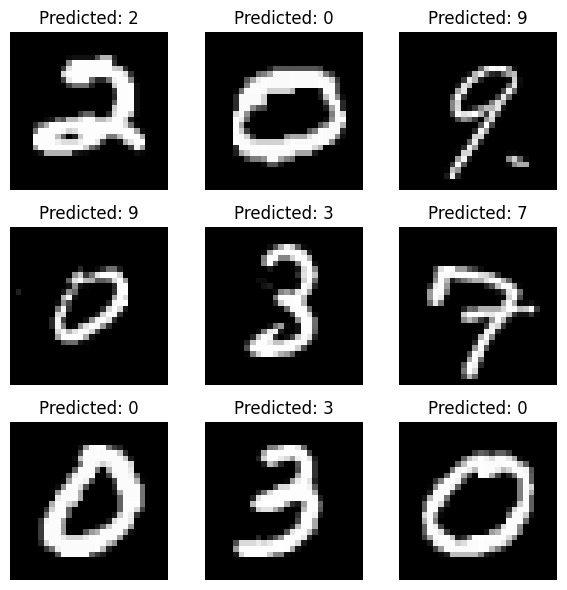

In [15]:
#display the first 9 images with their predicted labels
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test[i].reshape(28, 28), cmap='gray') 
    plt.title(f"Predicted: {predictions[i]}") 
    plt.axis('off') 

plt.tight_layout()
plt.show()

In [16]:
submission = pd.DataFrame({"ImageId": list(range(1, len(predictions) + 1)), "Label": predictions})
submission.to_csv('/kaggle/working/submission.csv', index=False)